<a href="https://colab.research.google.com/github/Amara-Nishat/assignment/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your Tweets CSV file (e.g., Tweets.csv) now:


Saving Tweets.csv to Tweets.csv
Loaded file: Tweets.csv

Dataset shape: (14640, 15)
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
After dropping nulls: (14640, 15)
Train/test sizes: (11712, 5000) (2928, 5000)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



===== Logistic Regression Classification Report =====
              precision    recall  f1-score   support

    negative     0.8414    0.8905    0.8652      1835
     neutral     0.6074    0.5790    0.5929       620
    positive     0.7646    0.6385    0.6959       473

    accuracy                         0.7838      2928
   macro avg     0.7378    0.7027    0.7180      2928
weighted avg     0.7794    0.7838    0.7802      2928


===== Random Forest Classification Report =====
              precision    recall  f1-score   support

    negative     0.8173    0.8725    0.8440      1835
     neutral     0.5602    0.5177    0.5381       620
    positive     0.6894    0.5772    0.6283       473

    accuracy                         0.7497      2928
   macro avg     0.6890    0.6558    0.6701      2928
weighted avg     0.7422    0.7497    0.7444      2928


--- Macro-average metrics ---
Logistic Regression -> Precision: 0.7378, Recall: 0.7027, F1: 0.7180
Random Forest       -> Precision: 

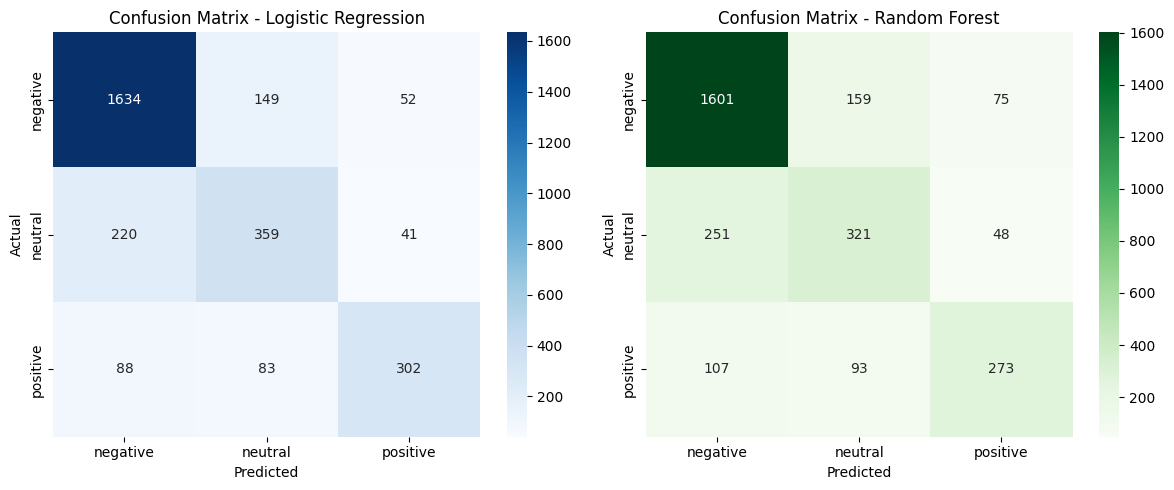


Summary table:
                Model  Precision_macro  Recall_macro  F1_macro
0  LogisticRegression         0.737801      0.702658  0.717996
1        RandomForest         0.688952      0.655796  0.670137


In [1]:
# ---------- STEP 0: Install / Import ----------
# (No extra installs needed for standard Colab)
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: UPLOAD DATASET ----------
print("Upload your Tweets CSV file (e.g., Tweets.csv) now:")
uploaded = files.upload()  # Choose Tweets.csv from your computer

# Replace filename below if your file name is different
fname = list(uploaded.keys())[0]
print("Loaded file:", fname)
df = pd.read_csv(fname)

# Quick check
print("\nDataset shape:", df.shape)
print(df.columns)

# ---------- STEP 2: BASIC CLEAN / PREP ----------
# Ensure text column exists
if 'text' not in df.columns:
    raise ValueError("No 'text' column found in dataset. Make sure tweet text column is named 'text'.")

# Drop rows with missing labels or text
df = df.dropna(subset=['text', 'airline_sentiment']).reset_index(drop=True)
print("After dropping nulls:", df.shape)

# Map sentiment to labels (keep as strings for classification_report)
# If you already have numeric labels, you can skip mapping
# Here we keep target as categorical strings (sklearn accepts them)
y = df['airline_sentiment']

# ---------- STEP 3: FEATURE EXTRACTION (simple bag-of-words) ----------
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'].astype(str))

# ---------- STEP 4: TRAIN-TEST SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Train/test sizes:", X_train.shape, X_test.shape)

# ---------- STEP 5: TRAIN MODELS ----------
# Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ---------- STEP 6: EVALUATION (Precision/Recall/F1) ----------
print("\n===== Logistic Regression Classification Report =====")
print(classification_report(y_test, y_pred_lr, digits=4))

print("\n===== Random Forest Classification Report =====")
print(classification_report(y_test, y_pred_rf, digits=4))

# Macro averages (useful when classes imbalance)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print("\n--- Macro-average metrics ---")
print(f"Logistic Regression -> Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1: {f1_lr:.4f}")
print(f"Random Forest       -> Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}")

# ---------- STEP 7: CONFUSION MATRICES (visual) ----------
labels = sorted(y.unique())  # class order
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# ---------- STEP 8: SAVE RESULTS (optional) ----------
results_df = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForest'],
    'Precision_macro': [precision_lr, precision_rf],
    'Recall_macro': [recall_lr, recall_rf],
    'F1_macro': [f1_lr, f1_rf]
})
print("\nSummary table:")
print(results_df)
# results_df.to_csv('assignment7_results.csv', index=False)
